<a href="https://colab.research.google.com/github/Jeetkavaiya/Prasunet-Internship-Tasks/blob/main/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:43<00:00, 22.8MB/s]
100% 1.98G/1.98G [01:44<00:00, 20.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing

In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [7]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

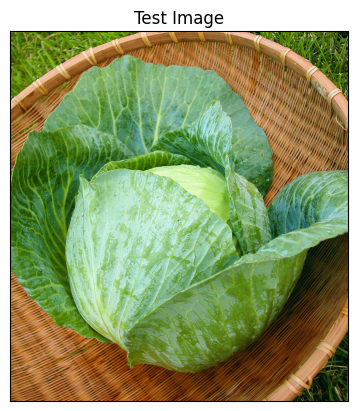

In [8]:
#Test Image Visualization
import cv2
image_path = '/content/test/cabbage/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 271ms/step


In [10]:
print(predictions)

[[0.00604291 0.04001701 0.00185677 0.02418708 0.07281967 0.01580722
  0.01263939 0.04381609 0.01444602 0.05427293 0.04586478 0.0029968
  0.03566169 0.02571476 0.01787953 0.04115347 0.04360049 0.04344913
  0.04845601 0.03435037 0.01537554 0.01451484 0.00268763 0.03493199
  0.04706933 0.03818933 0.00146891 0.01823958 0.02182829 0.0565559
  0.04775178 0.04044801 0.00640453 0.00335843 0.01071307 0.01543073]]


In [11]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

4


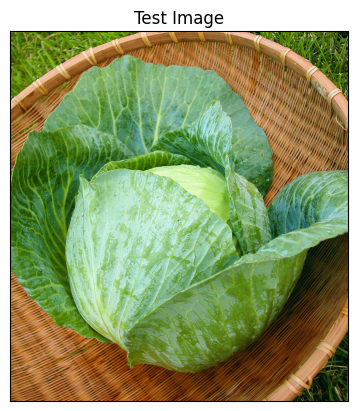

In [13]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a cabbage
